<a href="https://colab.research.google.com/github/rbarkerclarke/MaskMimicMaintain/blob/main/Plot_FP_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
!pip install emcee
!pip install -r /content/spatial-fokker-planck/requirements.txt


ERROR: Invalid requirement: '_libgcc_mutex=0.1=main': Expected package name at the start of dependency specifier
    _libgcc_mutex=0.1=main
    ^ (from line 4 of /content/spatial-fokker-planck/requirements.txt)
Hint: = is not a valid operator. Did you mean == ?


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns
%matplotlib inline

In [3]:
def fx(x,awm,amw,s,mu):
    if awm==0:
        return(s*x)
    f = (-x + mu*np.log(1-x)+mu*np.log(x)-x*amw/awm + np.log(1+x*awm)*(amw + (1+s+amw)*awm)/(awm**2))
    #fx = (-a21*(a12+a21)*x + (a12+a21+a12*a21+a21*s)*np.log(1+ a21+ a21*x))/(a21**2)

    return(f)

def potential(x,N, mu, a12,a21,s):
    phi = np.log(x*(1-x)/2*N)-2*N*fx(x,a12,a21,s,mu)
    return(phi)



In [4]:
vals = 1000 # number of points to evaluate function over

p = np.linspace(0.001,0.999,vals)

# Function values
N=1000
mu=0.01
s=+0.1


a12_list = [round(random.uniform(-0.1, 0.1),3) for i in range(20)]
a21_list = [round(random.uniform(-0.1, 0.1),3) for i in range(20)]

fp_sol = []
fp_mode=[]
fp_pot=[]

for a12,a21 in zip(a12_list, a21_list):
    j=a12 = 0.14
    k=a21 = 0.16
    q = potential(p,N, mu, a12,a21,s)
    #mean_pot = np.mean(q)
    #print(q)# - mean_pot)
    c = np.exp(-(q)) #-mean_pot))
    #print(c)
    #print(sum(c))
    fp_pot.append(-q)
    fp_sol.append(c)
    fp_mode.append(p[c==max(c)])


Solution for single alpha pair

s_0.1_amw_0.14awm_0.16mu_0.01


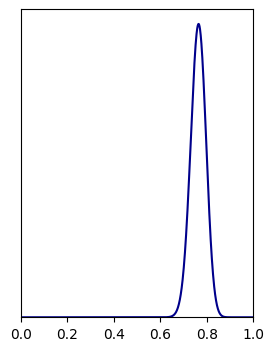

In [6]:
name = 's_'+str(s)+'_amw_'+str(round(a12,4))+'awm_'+str(round(a21,4))+'mu_'+str(mu)
print(name)
i=1
plt.plot(p, fp_sol[i]/sum(fp_sol[i]), color = 'darkblue')
plt.xlim(0,1)
plt.ylim(0)
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,      # ticks along the top edge are off
    labelleft=False)
plt.gcf().set_size_inches(3, 4)
plt.savefig(name+'.png',dpi=300)

Solution for many alphas

In [ ]:
vals = 1000 # number of points to evaluate function over

p = np.linspace(0.01,0.99,vals)

# Function values
N=1000
mu=0.01
s=-0.05


a12_list = [round(random.uniform(-0.3, 0.3),7) for i in range(100000)]
a21_list = [round(random.uniform(-0.3, 0.3),7) for i in range(100000)]

fp_sol = []
fp_mode=[]
fp_pot=[]

for a12,a21 in zip(a12_list, a21_list):

    #a12 = 0.1
    j=a12
    #a21 = -0.091091
    k=a21# =
    #print(p,N, mu, a12,a21,s)
    q = potential(p,N, mu, a12,a21,s)
    #print(a12,a21)
    mean_pot = np.mean(q)
    #print(q - mean_pot)
    c = np.exp(-(q)) #-mean_pot
    fp_pot.append(-q)
    fp_sol.append(c)
    fp_mode.append(p[c==max(c)][0])



In [ ]:
g =sns.scatterplot(x=a12_list, y=a21_list, hue = fp_mode,legend=False, edgecolor = "none")

# save the plot as PNG file
plt.axhline(0,c='black')
plt.axvline(0,c='black')
plt.savefig('theoreticalMODE.png', dpi=300)


In [ ]:
name = 's_'+str(s)+'_amw_'+str(round(a12,4))+'awm_'+str(round(a21,4))+'mu_'+str(mu)
print(name)
plt.plot(p, fp_sol[i]/sum(fp_sol[i]), color = 'darkblue')
plt.xlim(0,1)
plt.ylim(0)
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,      # ticks along the top edge are off
    labelleft=False)
plt.gcf().set_size_inches(3, 4)
plt.savefig(name+'.png',dpi=200)

In [ ]:
print('s'+str(s)+'a12_'+str(round(a12_list[i],4))+'a21_'+str(round(a21_list[i],4)))
plt.plot(p, fp_sol[i]*N*mu/sum(fp_sol[i]), color = 'darkblue')
plt.xlim(0,1)
plt.ylim(0)

In [ ]:
plt.plot(p, fp_pot[0]/sum(fp_pot[0]), color = 'darkblue')

In [ ]:
i = 7

print('s'+str(s)+'a12_'+str(round(a12_list[i],4))+'a21_'+str(round(a21_list[i],4)))
plt.plot(p, fp_sol[i]/sum(fp_sol[i]), color = 'darkblue')
plt.xlim(0,1)
plt.ylim(0)

In [ ]:
i = 17
print('s'+str(s)+'a12_'+str(round(a12_list[i],4))+'a21_'+str(round(a21_list[i],4)))
plt.plot(p, fp_sol[i]/sum(fp_sol[i]), color = 'darkblue')
plt.xlim(0,1)
plt.ylim(0)

In [ ]:
i = 7
print('s'+str(s)+'a12_'+str(round(a12_list[i],4))+'a21_'+str(round(a21_list[i],4)))
plt.plot(p, fp_sol[i]/sum(fp_sol[i]), color = 'darkblue')
plt.xlim(0,1)
plt.ylim(0)

In [ ]:
i = 4
print('s'+str(s)+'a12_'+str(round(a12_list[i],4))+'a21_'+str(round(a21_list[i],4)))
plt.plot(p, fp_sol[i]/sum(fp_sol[i]), color = 'darkblue')
plt.xlim(0,1)
plt.ylim(0)

In [ ]:
i = 1
print('s'+str(s)+'a12_'+str(round(a12_list[i],4))+'a21_'+str(round(a21_list[i],4)))
plt.plot(p, fp_sol[i]/sum(fp_sol[i]), color = 'darkblue')
plt.xlim(0,1)
plt.ylim(0)

In [ ]:
i = 6
print('s'+str(s)+'a12_'+str(round(a12_list[i],4))+'a21_'+str(round(a21_list[i],4)))
plt.plot(p, fp_sol[i]/sum(fp_sol[i]), color = 'darkblue')
plt.xlim(0,1)
plt.ylim(0)

In [ ]:
i = 0
print('s'+str(s)+'a12_'+str(round(a12_list[i],4))+'a21_'+str(round(a21_list[i],4)))
plt.plot(p, fp_sol[i]/sum(fp_sol[i]), color = 'darkblue')
plt.xlim(0,1)
plt.ylim(0)

In [ ]:
graph =sns.scatterplot(x =a12_list, y=a21_list, hue=fp_mean, linewidth=0)
graph.axhline(0, c="black")
graph.axvline(0,  c="black")
graph.axhline(s, c="black", linestyle='--')
graph.axvline(-s,  c="black", linestyle='--')
graph.legend('')

print(s, N, mu)



In [ ]:
if (a12>-2 and a21>-2):
    plt.figure()
    plt.plot(p,np.log(c))
    plt.text(np.min(p), np.log(np.min(c)), (round(a12,2),round(a21,2)))
    plt.show()
    plt.figure()
    plt.plot(p,c)
    plt.text(np.min(p), np.min(c), (round(a12,2),round(a21,2)))
    plt.show()

In [ ]:
#c = np.exp(-potential(b,N, mu, a12,a21,s))


In [ ]:
potential(x,N,mu,a12,a21,s)

Import fitting code from Sydney's Repository

In [16]:
!git clone https://github.com/sydleither/spatial-fokker-planck.git


fatal: destination path 'spatial-fokker-planck' already exists and is not an empty directory.


In [40]:
!git clone https://github.com/rbarkerclarke/MaskMimicMaintain/

Cloning into 'MaskMimicMaintain'...
remote: Enumerating objects: 100, done.
remote: Counting objects: 100% (100/100), done.
remote: Compressing objects: 100% (81/81), done.
remote: Total 100 (delta 44), reused 46 (delta 17), pack-reused 0 (from 0)
Receiving objects: 100% (100/100), 6.12 MiB | 24.11 MiB/s, done.
Resolving deltas: 100% (44/44), done.


In [46]:

import sys
sys.path.append('/content/spatial-fokker-planck/')
sys.path.append('/content/MaskMimicMaintain/')

from importlib import reload  # Python 3.4+



In [30]:
!python  /content/spatial-fokker-planck/mcmc_fit_to_self.py 100 0.01 0.01 0.01 0.01

In [31]:
!python /content/spatial-fokker-planck/mcmc_fit_to_data.py

Please provide N, mu, and the data path.


Generate simulation to plot

In [272]:
import importlib
import WFutils
importlib.reload(WFutils)
from WFutils import *

pop = {'0':50,'1':50}

#outcome = np.array([simulate(s,x,y) for x,y in merged_list ])
outcomes = []
histories = []
histories1 = []
s=0      # Intrinsic selection difference
sm=0.11    # Selection to mimic
mutation_rate = mu = 0.01
generations = gens = 100000
reps = 1

for jj in np.linspace(-0.1,0.1,2):
    outcome = []
    history = []
    history1=[]
    print(jj)
    for i in range(1,reps+1):
        pop = {'0':50,'1':50}
        amw = jj
        awm = mimic_0(amw, s=sm)
        a = simulate(s,awm,amw,pop,mu, generations)
        history1.append([ii['0'] for ii in a])
        history.append(a)
        #print(s, j ,k )
    outcomes.append(outcome)
    histories1.append(flatten(history1))
    histories.append(history)


-0.1
0.1


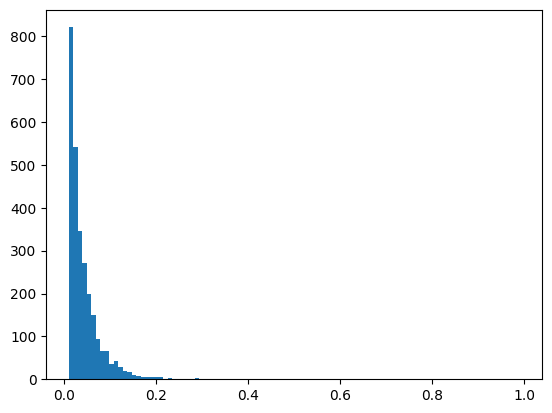

In [273]:
import random
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot

n= sum(pop.values())

WTfreqs=[i['0']/n for i in flatten(histories[1])]
WTfreqs_sample = random.sample(WTfreqs, 10000)

# Generate WF simulation data
counts, bins, patches = plt.hist(WTfreqs_sample, bins=np.linspace(0.01, 0.99, n+1))
counts = counts/sum(counts)



In [274]:


import sys

import numpy as np

params = (n, mu, awm, amw, sm)
params = [float(x) for x in params]
true_params = params[2:]
print(params)


from fokker_planck import FokkerPlanck, param_names
from mcmc_utils import (mcmc, plot_walker_curves,
                        plot_walker_gamespace, plot_walker_params)

n=sum(pop.values())
fp = FokkerPlanck(n, mu).fokker_planck
xdata = np.linspace(0.01, 0.99, n)

ydata= counts

walker_ends = mcmc(fp, xdata, ydata)
save_loc="."

file_name = "_".join([f"{param_names[i]}={params[i]}" for i in range(len(params))])
plot_walker_curves(save_loc, file_name, fp, walker_ends, xdata, ydata)
plot_walker_gamespace(save_loc, file_name, walker_ends, true_params)
plot_walker_params(save_loc, file_name, walker_ends)




[100.0, 0.01, -0.09909909909909909, 0.1, 0.11]


/content/spatial-fokker-planck/mcmc_utils.py:93: RuntimeWarning: divide by zero encountered in divide
  return -0.5*np.sum(((y-func(x, *params))/yerr)**2)
/usr/local/lib/python3.11/dist-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
